#Liberaries


In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import pickle

#preprossing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
#Algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#evaluate model
from sklearn.metrics import (confusion_matrix,classification_report,
                             accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve,
                             log_loss, balanced_accuracy_score, matthews_corrcoef,
                             cohen_kappa_score, fbeta_score, hamming_loss,
                             jaccard_score, brier_score_loss)
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, make_scorer
from IPython.core.debugger import set_trace

import warnings
warnings.filterwarnings('ignore')

#Load Data

In [2]:
# load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/ASD/Balanced_Adult/Autism-Adult-Data.csv',index_col=False)
data.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ... gender       ethnicity jundice autism  \
0         1         0          0  ...      f  White-European      no     no   
1         1         0          1  ...      m          Latino      no    yes   
2         1         1          1  ...      m          Latino     yes    yes   
3         1         0          1  ...      f  White-European      no    yes   
4         1         0          0  ...      f               ?      no     no   

     contry_of_res used_app_before result       age_desc relation Class/ASD  
0  'United States'              no      6  '18 and more'     Self        NO  
1           Brazil              no      5  '18 and more'     Self        NO  
2            Spain              no      8  '18 and more'   Parent       YES  
3  'United States'              no      6  '18 and more'     Self        NO  
4            Egypt              no      2  '18 and more'        ?        NO  

[5 rows x 21 columns]

#DataPreprossing

In [4]:
# Verify column names
print("Column names:", data.columns)
data.info()
data.shape

Column names: Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'autism', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null 

(704, 21)

In [5]:
data = data.drop(['result', 'age_desc'], axis=1)

In [6]:
data = data.rename(columns={'Class/ASD': 'ASD'})

In [7]:
data.duplicated().sum()

5

In [8]:
# data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()


5

In [10]:
data.shape

(704, 19)

In [11]:
# Function to find columns with a specific value
def get_columns_with_value(df, value):
    columns_with_value = [col for col in df.columns if df[col].eq(value).any()]
    return columns_with_value

# Get columns that contain the value '?'
columns_with_value = get_columns_with_value(data, '?')
print("\nColumns that contain the value '?':")
print(columns_with_value)



Columns that contain the value '?':
['age', 'ethnicity', 'relation']


In [12]:
# Replace specific data in specific columns with empty strings
value_to_replace = '?'  # Value to replace
columns_to_replace_in = ['age', 'ethnicity', 'relation']  # Replace with actual column names you want to replace in

# Replace the specific value with an empty string in the specified columns
for column in columns_to_replace_in:
    data.loc[data[column] == value_to_replace, column] = ''

In [13]:
data.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score age gender       ethnicity jundice autism  \
0         1         0          0  26      f  White-European      no     no   
1         1         0          1  24      m          Latino      no    yes   
2         1         1          1  27      m          Latino     yes    yes   
3         1         0          1  35      f  White-European      no    yes   
4         1         0          0  40      f                      no     no   

     contry_of_res used_app_before relation  ASD  
0  'United States'              no     Self   NO  
1           Brazil              no     Self   NO  
2            Spain              no   Parent  YES  
3  'United States'              no     Self   NO  
4            Egypt              no            NO

In [14]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
autism             0
contry_of_res      0
used_app_before    0
relation           0
ASD                0
dtype: int64

In [15]:
#Making classes of categorical variables same for all datasets
data["relation"] = data["relation"].replace('self','Self')

In [16]:
data['contry_of_res']

0      'United States'
1               Brazil
2                Spain
3      'United States'
4                Egypt
            ...       
699             Russia
700             Mexico
701             Russia
702           Pakistan
703             Cyprus
Name: contry_of_res, Length: 704, dtype: object

In [17]:
data['contry_of_res'] = data['contry_of_res'].str.replace(r'[\'"]', '', regex=True).str.replace(' ','')
data['contry_of_res']

0      UnitedStates
1            Brazil
2             Spain
3      UnitedStates
4             Egypt
           ...     
699          Russia
700          Mexico
701          Russia
702        Pakistan
703          Cyprus
Name: contry_of_res, Length: 704, dtype: object

In [18]:
# data['ASD']= data['ASD'].replace('YES','1',inplace=True)
data.loc[data['ASD'] == 'YES', 'ASD']=1
data.loc[data['ASD'] == 'NO', 'ASD']=0
data['ASD']= pd.to_numeric(data['ASD'])
data['ASD']

0      0
1      0
2      1
3      0
4      0
      ..
699    1
700    0
701    1
702    0
703    1
Name: ASD, Length: 704, dtype: int64

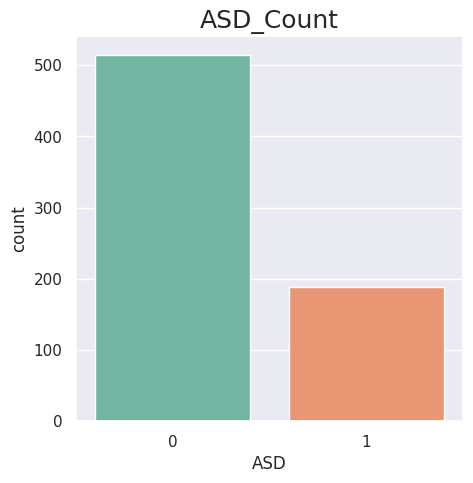

ASD
0    515
1    189
Name: count, dtype: int64

In [19]:
plt.figure(figsize=(5, 5))
sns.countplot(x='ASD', data=data,palette='Set2')
plt.title('ASD_Count', fontsize=18)
plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/Features_figs/ASD_count.png')
plt.show()
data['ASD'].value_counts()

In [20]:
#get numeric data properities
data.describe()

A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  704.000000  704.000000  704.000000  704.000000  704.000000  704.000000   
mean     0.721591    0.453125    0.457386    0.495739    0.498580    0.284091   
std      0.448535    0.498152    0.498535    0.500337    0.500353    0.451301   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         ASD  
count  704.000000  704.000000  704.000000  704.000000  704.000000  
mean     0.417614    0.649148    0.323864    0.573864    0.268466  
std      0.493516    0.477576    0.468281    0.494866    0.443476  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    1.000000    0.000000    1.000000    0.000000  
75%      1.000000    1.000000    1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [21]:
#get categorical data properities
data.describe(include='O')

age gender       ethnicity jundice autism contry_of_res  \
count   704    704             704     704    704           704   
unique   47      2              12       2      2            67   
top      21      m  White-European      no     no  UnitedStates   
freq     49    367             233     635    613           113   

       used_app_before relation  
count              704      704  
unique               2        6  
top                 no     Self  
freq               692      522

In [22]:
data.isnull().sum().sum()

0

#Features(X)and target(Y)

In [23]:
# Split features and target
X = data.drop(columns=['ASD'])
y = data['ASD']


In [24]:
X.shape

(704, 18)

In [25]:
y.shape

(704,)

#DataEncoding


In [26]:
numerical_data=X.select_dtypes(include=[np.number]).columns
numerical_data

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score'],
      dtype='object')

In [27]:
categorical_data=X.select_dtypes(include=[object]).columns
categorical_data

Index(['age', 'gender', 'ethnicity', 'jundice', 'autism', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [28]:
# Impute missing values in numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
data[numerical_data] = numeric_imputer.fit_transform(data[numerical_data])

# Impute missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_data] = categorical_imputer.fit_transform(data[categorical_data])

# Display the modified DataFrame with the original headers
print("\nDataFrame after imputing missing values:")
print(data.head())


DataFrame after imputing missing values:
   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0       1.0       1.0       1.0       1.0       0.0       0.0       1.0   
1       1.0       1.0       0.0       1.0       0.0       0.0       0.0   
2       1.0       1.0       0.0       1.0       1.0       0.0       1.0   
3       1.0       1.0       0.0       1.0       0.0       0.0       1.0   
4       1.0       0.0       0.0       0.0       0.0       0.0       0.0   

   A8_Score  A9_Score  A10_Score age gender       ethnicity jundice autism  \
0       1.0       0.0        0.0  26      f  White-European      no     no   
1       1.0       0.0        1.0  24      m          Latino      no    yes   
2       1.0       1.0        1.0  27      m          Latino     yes    yes   
3       1.0       0.0        1.0  35      f  White-European      no    yes   
4       1.0       0.0        0.0  40      f                      no     no   

  contry_of_res used_app_before relati

In [29]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
autism             0
contry_of_res      0
used_app_before    0
relation           0
ASD                0
dtype: int64

In [30]:
# Print the name of each feature
print("Feature names:")
for i, feature in enumerate(X.columns, start=1):
    print(f'X{i-1} is {feature}')

Feature names:
X0 is A1_Score
X1 is A2_Score
X2 is A3_Score
X3 is A4_Score
X4 is A5_Score
X5 is A6_Score
X6 is A7_Score
X7 is A8_Score
X8 is A9_Score
X9 is A10_Score
X10 is age
X11 is gender
X12 is ethnicity
X13 is jundice
X14 is autism
X15 is contry_of_res
X16 is used_app_before
X17 is relation


In [31]:
copy_X=X

In [32]:
#Data Encoder
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        self.encoders = {col: LabelEncoder().fit(X[col]) for col in self.columns}
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = self.encoders[col].transform(X_copy[col])
        return X_copy

# Apply the custom encoder
mcle = MultiColumnLabelEncoder(columns=['age', 'gender', 'ethnicity', 'jundice', 'autism', 'contry_of_res',
       'used_app_before', 'relation'])

X_label_encoded = mcle.fit_transform(copy_X)
print(X_label_encoded)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  age  gender  ethnicity  jundice  autism

In [33]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label_encoded)
X_scaled

array([[ 0.62114956,  1.09858844,  1.08919025, ...,  1.03415439,
        -0.13168538,  0.51640515],
       [ 0.62114956,  1.09858844, -0.91811325, ..., -1.60951092,
        -0.13168538,  0.51640515],
       [ 0.62114956,  1.09858844, -0.91811325, ...,  0.6194618 ,
        -0.13168538, -0.63043783],
       ...,
       [ 0.62114956, -0.91025899,  1.08919025, ...,  0.36027892,
        -0.13168538, -2.35070229],
       [ 0.62114956, -0.91025899, -0.91811325, ...,  0.15293262,
        -0.13168538,  0.51640515],
       [ 0.62114956, -0.91025899,  1.08919025, ..., -1.29849147,
        -0.13168538,  0.51640515]])

#Feature Engineering

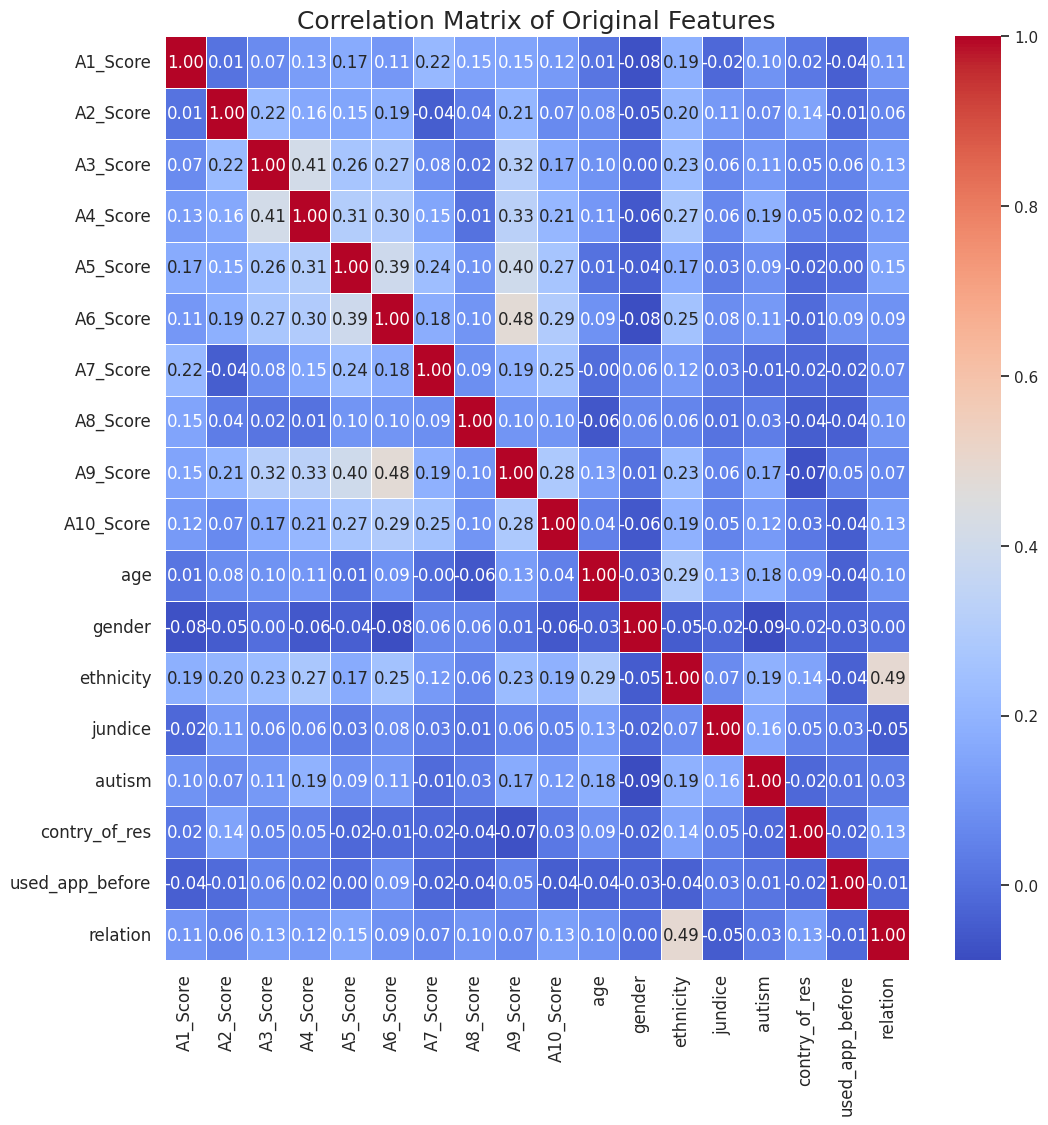

In [34]:
# Correlation matrix for original features (X_label_encoded)
plt.figure(figsize=(12, 12))
corr_matrix = X_label_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidth=.7)
plt.title('Correlation Matrix of Original Features', fontsize=18)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/Features_figs/original_features_correlation_matrix.png')
plt.show()

In [35]:
# Feature engineering (e.g., adding polynomial features)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)
X_poly

array([[ 1.        ,  0.62114956,  1.09858844, ..., -0.13618302,
         0.53404265, -0.06800301],
       [ 1.        ,  0.62114956,  1.09858844, ...,  0.21194906,
        -0.83115972, -0.06800301],
       [ 1.        ,  0.62114956,  1.09858844, ..., -0.08157406,
        -0.39053215,  0.08301945],
       ...,
       [ 1.        ,  0.62114956, -0.91025899, ..., -0.04744347,
        -0.84690848,  0.30955313],
       [ 1.        ,  0.62114956, -0.91025899, ..., -0.02013899,
         0.07897519, -0.06800301],
       [ 1.        ,  0.62114956, -0.91025899, ...,  0.17099235,
        -0.67054768, -0.06800301]])

In [36]:
# Plot Correlation after Polynomial Feature Expansion (X_poly)
X_poly_df = pd.DataFrame(X_poly)
plt.figure(figsize=(50, 45))
sns.heatmap(X_poly_df.corr(), annot=True, cmap='coolwarm',fmt='.1f',linewidth=.5)
plt.title('Correlation Matrix After Polynomial Feature Expansion',fontsize=20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/Features_figs/polynomial features_correlation_matrix.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [37]:
# Feature reduction based on correlation threshold
# Assuming X_poly_df is your DataFrame
threshold = 0.9  # Set your desired correlation threshold

# Calculate the correlation matrix
corr_matrix = X_poly_df.corr()
upper_triangle = np.triu(corr_matrix, k=1)  # Get upper triangle of correlation matrix

# Identify columns to drop based on threshold
high_corr_features = [i for i in range(len(X_poly_df.columns)) if any(np.abs(upper_triangle[:, i]) > threshold)]

# Drop the highly correlated columns
X_poly_reduced = X_poly_df.drop(columns=high_corr_features)


# Correlation matrix After Feature Reduction
# Assuming X_poly_reduced is your DataFrame after reduction
plt.figure(figsize=(50, 45))
corr_matrix1 = X_poly_reduced.corr()
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidth=.7)
plt.title('Correlation Matrix After Feature Reduction', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/Features_figs/Feature Reduction_correlation_matrix.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Data augmentation


In [38]:
X_poly_reduced.shape

(704, 172)

In [39]:
# Data augmentation by adding noise
def add_noise(X, noise_level=0.01):
    noise = np.random.normal(0, noise_level, X.shape)
    return X + noise

# Augment the data
X_augmented = add_noise(X_poly_reduced, noise_level=0.01)
X_augmented.shape

# Integrate original and augmented data
X_combined = np.concatenate((X_poly_reduced, X_augmented))
y_combined = np.concatenate((y, y))

print("X_poly_reduced shape:", X_poly_reduced.shape)
print("X_augmented shape:", X_augmented.shape)
print("y shape:", y.shape)

print("X_combined shape:", X_combined.shape)
print("y_combined shape:", y_combined.shape)

X_poly_reduced shape: (704, 172)
X_augmented shape: (704, 172)
y shape: (704,)
X_combined shape: (1408, 172)
y_combined shape: (1408,)


#Feature selection

In [40]:
# Feature selection
k_best = SelectKBest(score_func=f_regression, k=30)

# Verify column names
print("K_best Scores before polynomial:", k_best)


K_best Scores before polynomial: SelectKBest(k=30, score_func=<function f_regression at 0x781f49216980>)


In [41]:
X_selected = k_best.fit_transform(X_combined, y_combined)
X_selected


array([[ 0.62114956,  1.09858844,  1.08919025, ..., -0.81730134,
         0.80314508, -0.86155119],
       [ 0.62114956,  1.09858844, -0.91811325, ...,  0.58606486,
        -0.59639486, -0.15812175],
       [ 0.62114956,  1.09858844, -0.91811325, ...,  1.70629578,
         1.24510506,  0.33011382],
       ...,
       [ 0.62425379, -0.92649747,  1.08789808, ..., -0.82484207,
        -0.6202065 ,  0.89097078],
       [ 0.63056088, -0.9088697 , -0.91836949, ...,  1.70283671,
         1.22941408, -1.13041264],
       [ 0.62982519, -0.89570379,  1.08064065, ...,  1.71417182,
         1.24877963,  1.79307564]])

In [42]:
# Finding the optimal value of k
def find_best_k(X, y, max_k=30):
    best_k = 1
    best_score = -np.inf
    scores = []

    for k in range(1, max_k+1):
        k_best = SelectKBest(score_func=f_regression, k=k)
        X_selected = k_best.fit_transform(X, y)

        # Using cross-validation to evaluate the performance of the selected features
        score = cross_val_score(RandomForestRegressor(), X_selected, y, cv=5, scoring='r2').mean()
        scores.append(score)

        if score > best_score:
            best_score = score
            best_k = k

    return best_k, scores

best_k, scores = find_best_k(X_combined, y_combined)

print(f'Optimal number of features: {best_k}')


Optimal number of features: 30


In [43]:
# Feature selection with optimal k
k_best = SelectKBest(score_func=f_regression, k=best_k)
X_selected = k_best.fit_transform(X_combined, y_combined)

# Get selected feature names
feature_names = poly.get_feature_names_out(X.columns)
selected_features = [feature_names[i] for i in k_best.get_support(indices=True)]

print('Selected Features:', selected_features)

Selected Features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'ethnicity', 'A1_Score A6_Score', 'A1_Score A9_Score', 'A2_Score A5_Score', 'A3_Score A5_Score', 'A3_Score A6_Score', 'A3_Score A9_Score', 'A4_Score A5_Score', 'A4_Score A6_Score', 'A4_Score A9_Score', 'A5_Score A6_Score', 'A5_Score A9_Score', 'A5_Score ethnicity', 'A6_Score A7_Score', 'A6_Score A9_Score', 'A6_Score A10_Score', 'A6_Score ethnicity', 'A7_Score A9_Score', 'A9_Score A10_Score', 'A9_Score ethnicity']


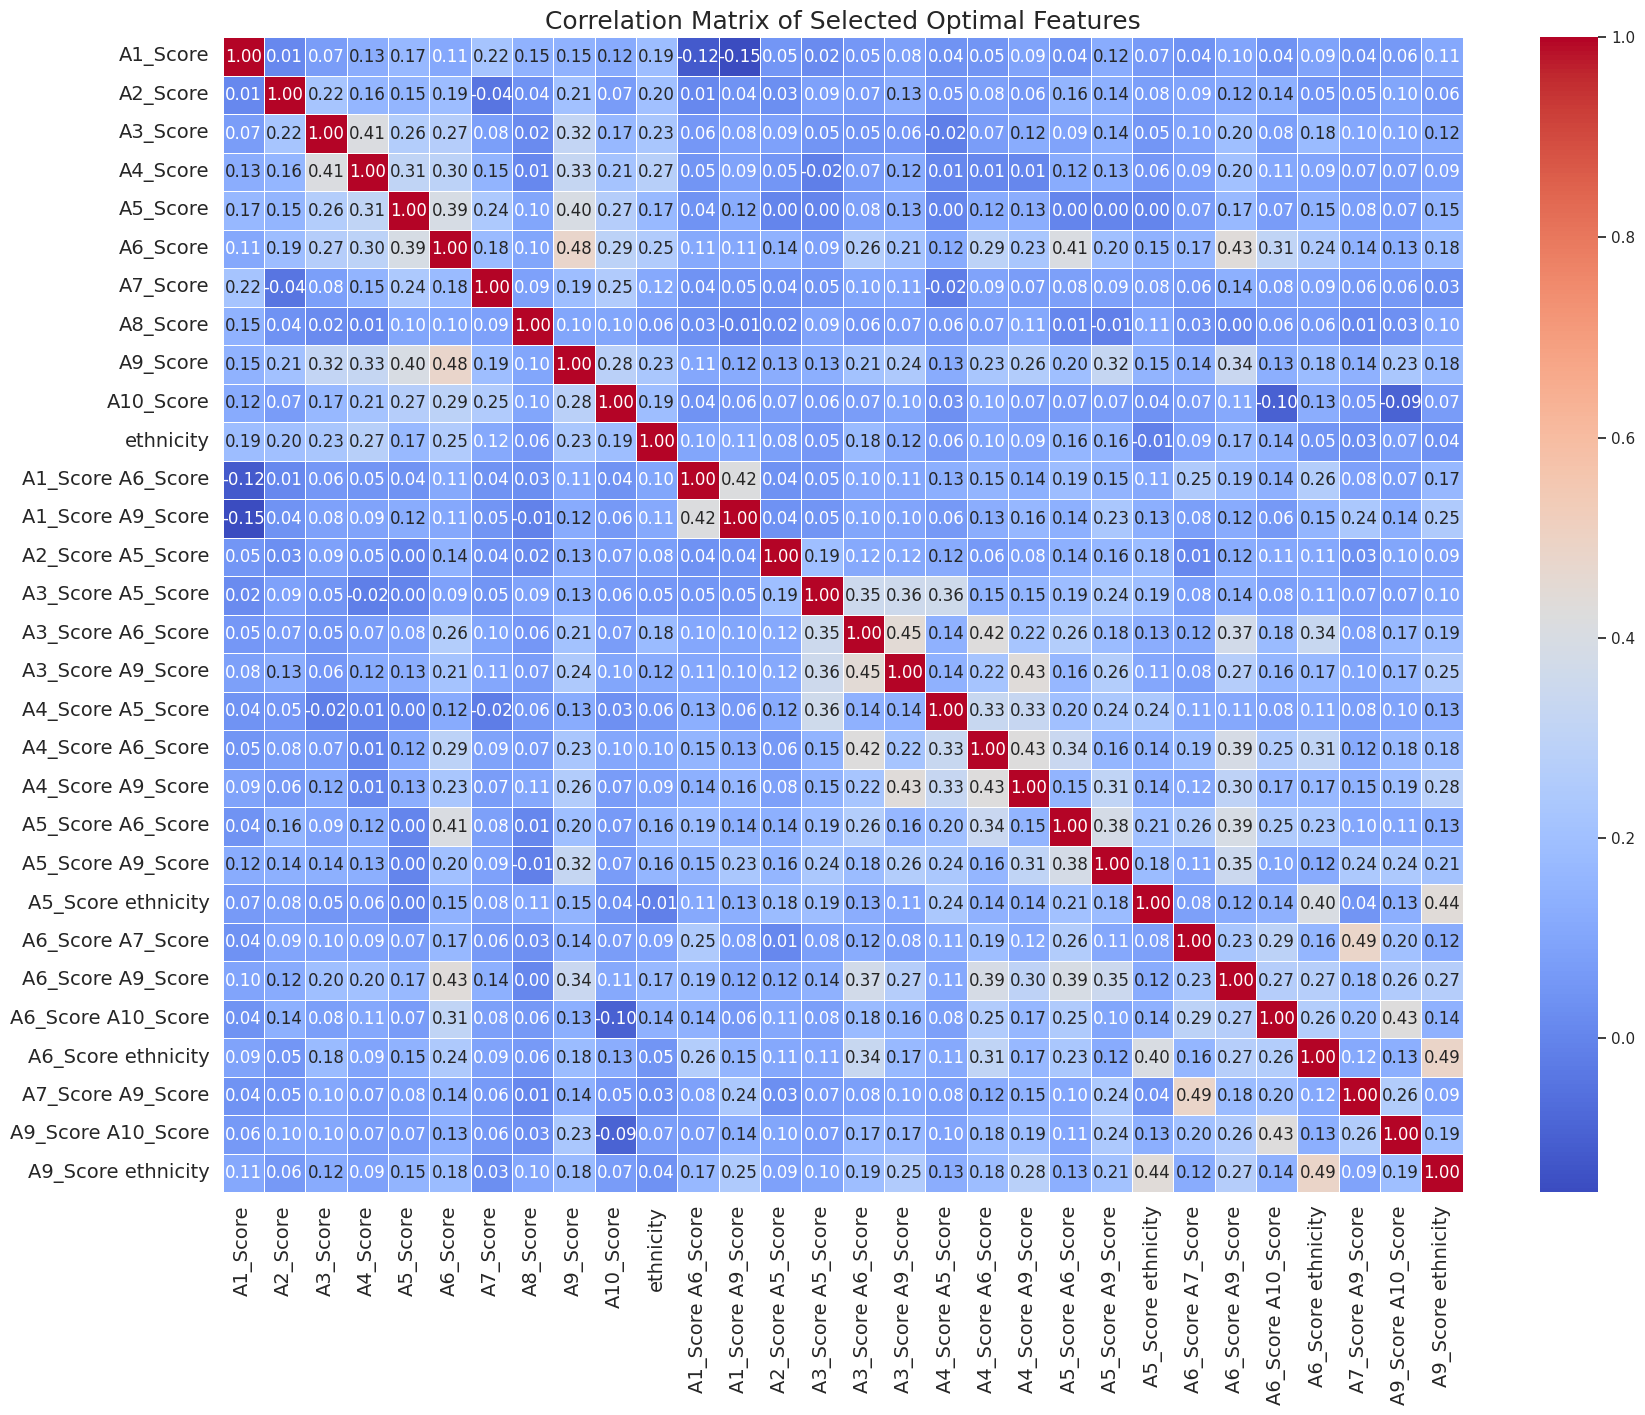

In [44]:
# Assuming the selected features are from the original dataset, we need to extract these from X_combined
selected_feature_indices = k_best.get_support(indices=True)

# Create a DataFrame for the selected features
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
selected_features_df = pd.DataFrame(X_combined[:, selected_feature_indices], columns=selected_feature_names)

# Draw the correlation matrix of the selected features
plt.figure(figsize=(20, 15))
selected_corr_matrix = selected_features_df.corr()
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidth=.7)
plt.title('Correlation Matrix of Selected Optimal Features', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/Features_figs/selected_features_correlation_matrix.png')
plt.show()

# Save DataFrame to Excel
selected_features_df.to_excel('/content/drive/MyDrive/ASD/Balanced_Adult/selected_features.xlsx', index=False)


Features Score [136.93061374 150.86000276 340.13477148 399.13986985 570.72964607
 759.06394035 198.40723178  83.94530301 952.24686544 245.77233555
 191.32863695  72.4116187   98.39616978  72.65051465  66.55147566
 107.76993192 158.749393    74.896962   131.20719251 165.44884032
 150.8767768  178.85639542  73.08477424  99.55720114 253.01915002
  84.00577728 118.16808399  80.93479199  84.83030403 105.37065804]


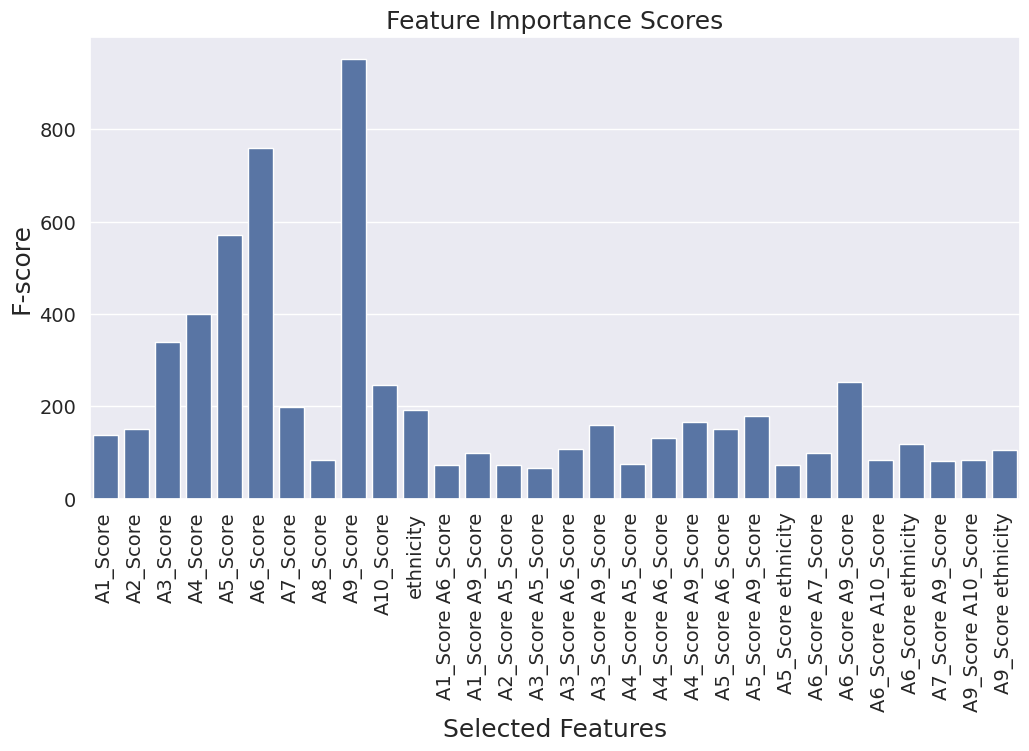

In [45]:
# Plot feature importances
feature_scores = k_best.scores_[k_best.get_support()]
print('Features Score', feature_scores)

#draw feature_importance
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_features, y=feature_scores)
plt.xlabel('Selected Features', fontsize=18)
plt.ylabel('F-score', fontsize=18)
plt.title('Feature Importance Scores', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/Features_figs/feature_importance_scores.png')
plt.show()



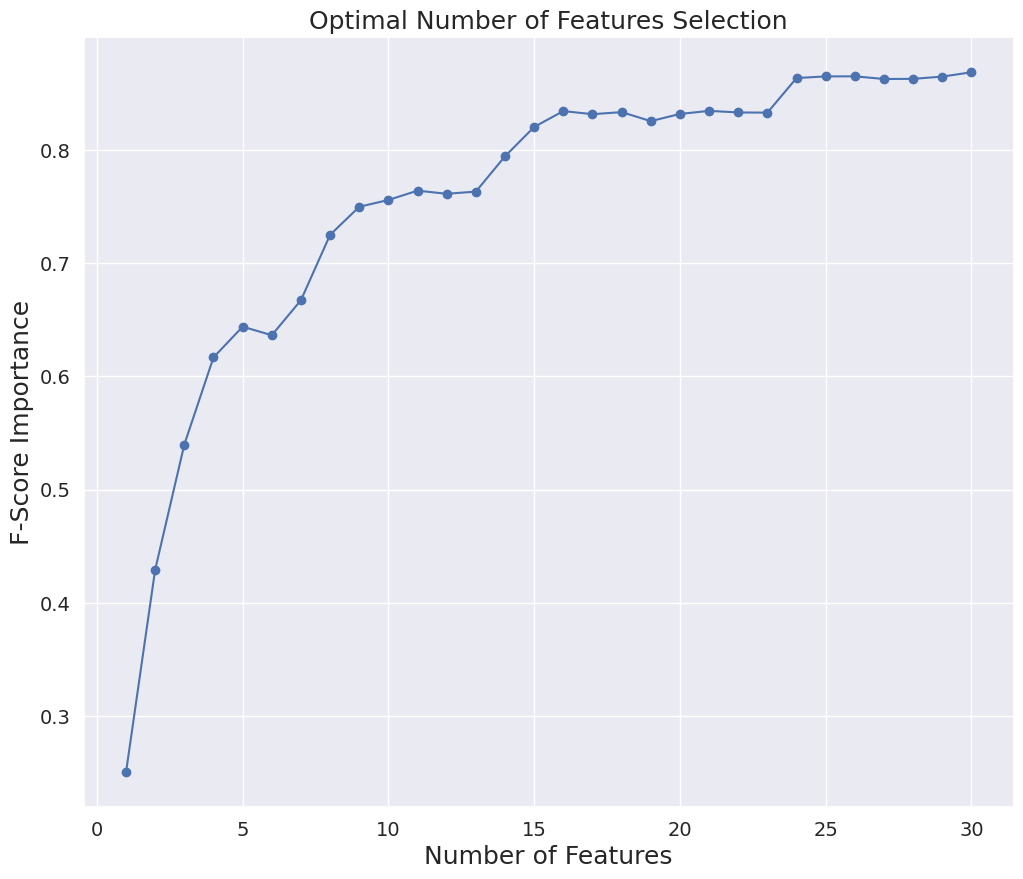

In [46]:
# Plot the scores for different values of k
plt.figure(figsize=(12, 10))
plt.plot(range(1, len(scores)+1), scores, marker='o')
plt.xlabel('Number of Features', fontsize=18)
plt.ylabel('F-Score Importance', fontsize=18)
plt.title('Optimal Number of Features Selection', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/Features_figs/optimal_number_of_features.png')
plt.show()


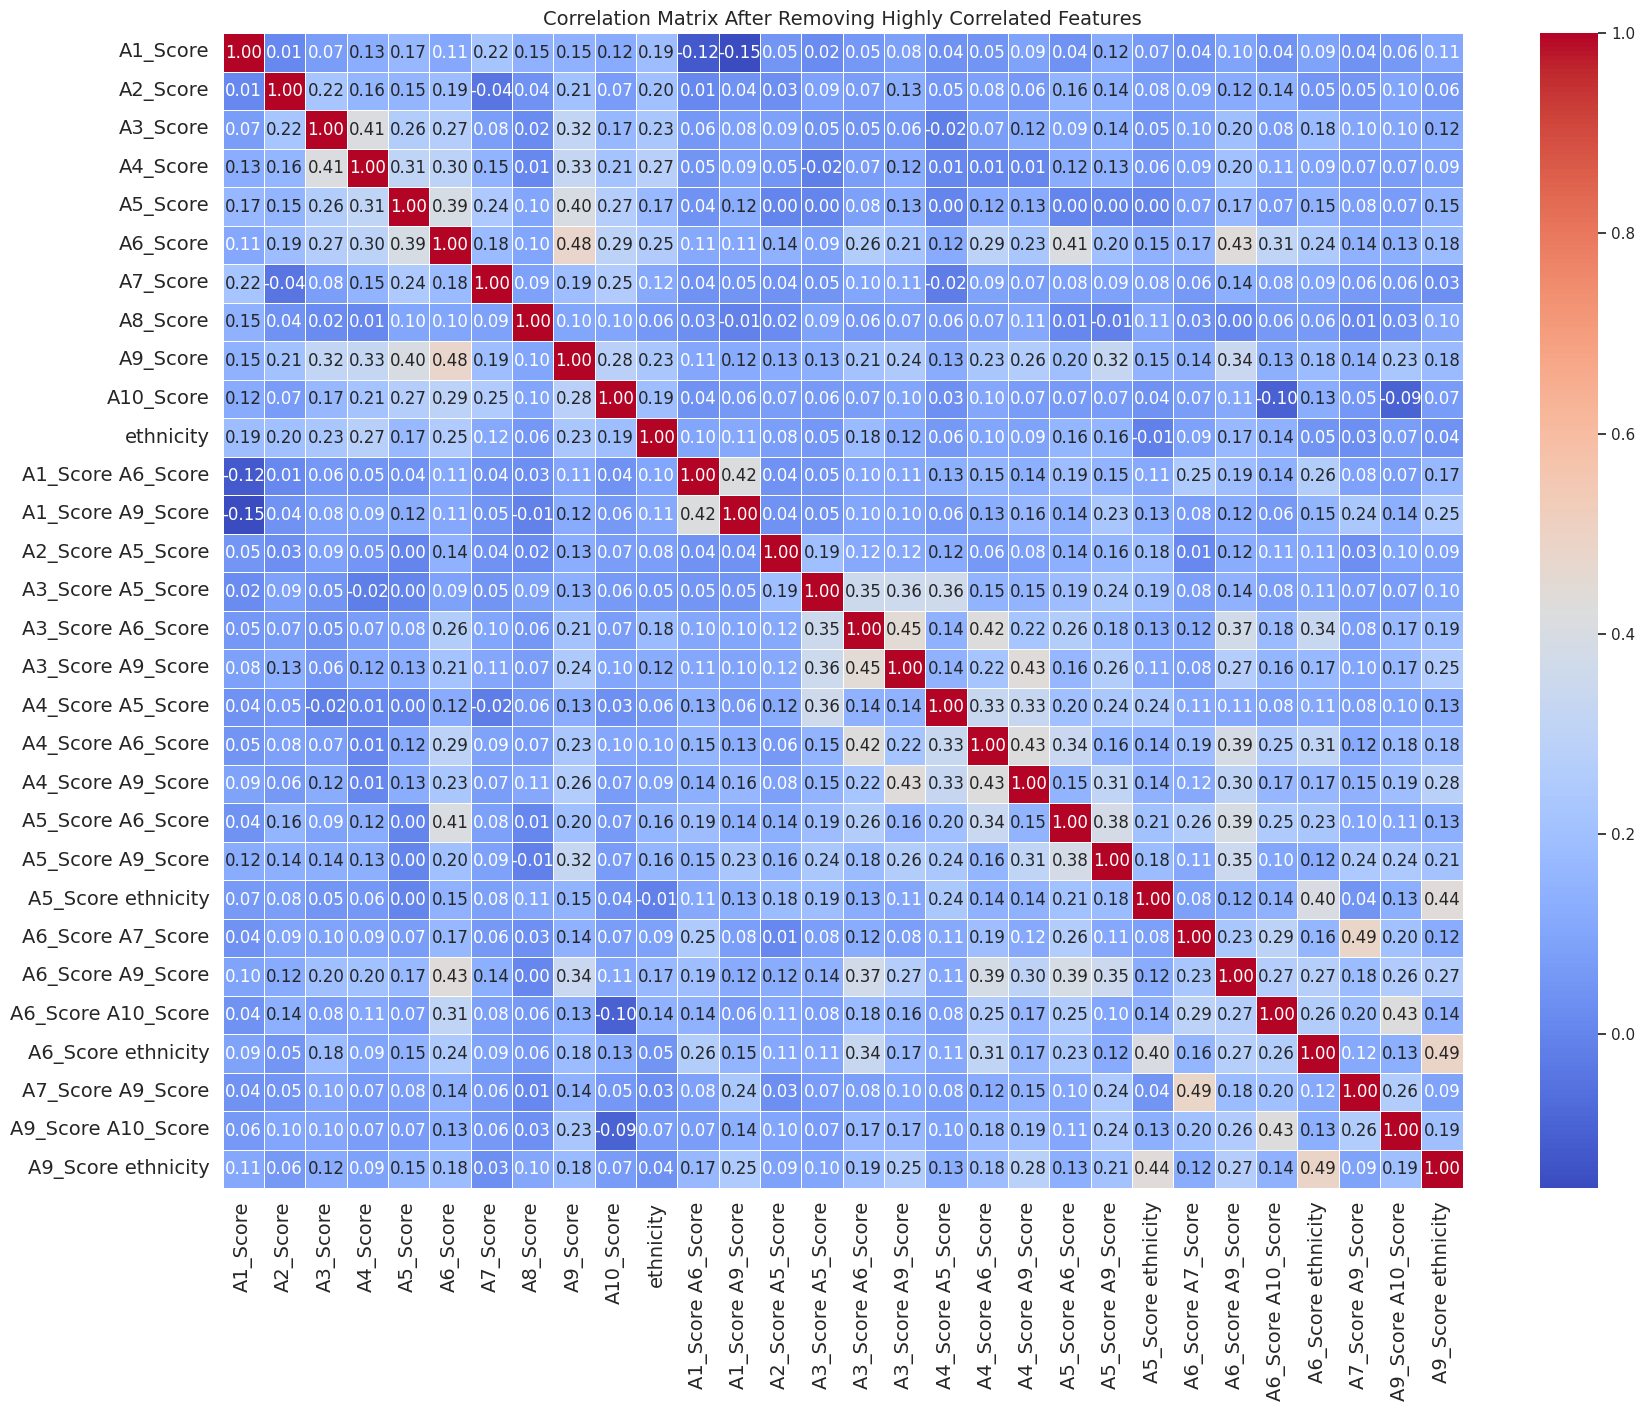

In [47]:
# Remove highly correlated features
def remove_highly_correlated_features(dataframe, threshold=0.85):
    corr_matrix = dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return dataframe.drop(columns=to_drop)

# Plot the correlation matrix for the reduced dataset
def plot_correlation_matrix(dataframe, title):
    plt.figure(figsize=(20, 15))
    corr_matrix = dataframe.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidth=.7)
    plt.title(title, fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/Features_figs/correlation_matrix_after_removing.png')
    plt.show()

# Convert selected features to DataFrame
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
X_reduced = remove_highly_correlated_features(X_selected_df)

# Convert reduced data to DataFrame and plot correlation matrix
X_reduced_df = pd.DataFrame(X_reduced, columns=X_reduced.columns)
plot_correlation_matrix(X_reduced_df, 'Correlation Matrix After Removing Highly Correlated Features')

#Split data

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, y_combined, test_size=0.2, random_state=42)

# Convert to DataFrames
X_train = pd.DataFrame(X_train, columns=X_reduced.columns)
X_test = pd.DataFrame(X_test, columns=X_reduced.columns)
y_train = pd.DataFrame(y_train, columns=['ASD'])
y_test = pd.DataFrame(y_test, columns=['ASD'])

#Balance data distribution


In [49]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter


# Display original class distribution
print("Original class distribution:", Counter(y))

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
# ---------------------
# #Balance data distribution
# from imblearn.combine import SMOTEENN

# # Initialize SMOTEENN
# smote_enn = SMOTEENN(random_state=42)

# # Fit and resample the data
# X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
# # -----------------
# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Identify columns with non-numeric data
# non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

# # Convert non-numeric columns to numeric using one-hot encoding
# X_encoded = pd.get_dummies(X_train, columns=non_numeric_cols)

# # Apply SMOTE to generate synthetic samples
# # Use the encoded feature matrix X_encoded
# X_resampled, y_resampled = smote.fit_resample(X_encoded, y_train)
# --------------------------

# Display new class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Create a new DataFrame with the balanced dataset
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['ASD'] = y_resampled

# Save the balanced dataset to a new CSV file
balanced_data.to_csv('/content/drive/MyDrive/ASD/Balanced_Adult/Balanced_Adult_Dataset.csv', index=False)

Original class distribution: Counter({0: 515, 1: 189})
Resampled class distribution: Counter({'ASD': 1})


In [50]:
X_resampled.shape

(1670, 30)

In [51]:
y_resampled.shape

(1670, 1)

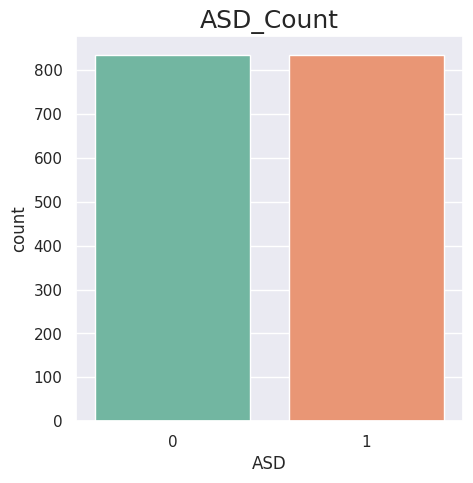

ASD
0    515
1    189
Name: count, dtype: int64

In [52]:
plt.figure(figsize=(5, 5))
sns.countplot(x='ASD', data=balanced_data,palette='Set2')
plt.title('ASD_Count', fontsize=18)
plt.savefig('/content/drive/MyDrive/ASD/Balanced_Adult/Features_figs/ASD_count_afterresample.png')
plt.show()
data['ASD'].value_counts()

In [53]:
#save 4 dataframs
X_train_data=X_resampled.to_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/X_train.csv', index=False)
X_test_data=X_test.to_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/X_test.csv', index=False)
y_train_data=y_resampled.to_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/y_train.csv', index=False)
y_test_data=y_test.to_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/y_test.csv', index=False)

In [54]:
#load 4 dataframes after preprossing
X_train = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/ASD/Balanced_Adult/DataAfterPreprossing/y_test.csv')

In [55]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

print('y_train shape', y_train.shape)

print('y_test shape', y_test.shape)

X_train shape (1670, 30)
X_test shape (282, 30)
y_train shape (1670, 1)
y_test shape (282, 1)


#Algorthims


In [56]:

classifiers = [
    'Random Forest',
    'Gradient Boosting',
    'Extra Trees',
    'Decision Tree',
    'K-Neighbors',
    'MLP'

]
RFc_Classifier=RandomForestClassifier(n_estimators=100)
GBc_Classifier=GradientBoostingClassifier(n_estimators=1000)
ETc_Classifier=ExtraTreesClassifier(n_estimators=100)
DTc_Classifier=DecisionTreeClassifier()
KNc_Classifier=KNeighborsClassifier()
MLP_Classifier=MLPClassifier()


accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
specificity_results = []
logloss_results = []
balanced_acc_results = []
mcc_results = []
kappa_results = []
f2_results = []
hamming_results = []
jaccard_results = []
brier_results = []

#Create model

In [57]:
def train_(Classifier):
    Classifier.fit(X_train, y_train)
    return Classifier

In [58]:
RFc_model=train_(RFc_Classifier)
GBc_model=train_(GBc_Classifier)
ETc_model=train_(ETc_Classifier)
DTc_model=train_(DTc_Classifier)
KNc_model=train_(KNc_Classifier)
MLP_model=train_(MLP_Classifier)



#SaveModel

In [59]:
import pickle

models = {
    'RFc_model': RFc_model,
    'GBc_model': GBc_model,
    'ETc_model': ETc_model,
    'DTc_model': DTc_model,
    'KNc_model': KNc_model,
    'MLP_model': MLP_model,

}

for model_name, model in models.items():
    model_filename = f'/content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/{model_name}.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f'{model_name} saved to {model_filename}')

RFc_model saved to /content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/RFc_model.pkl
GBc_model saved to /content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/GBc_model.pkl
ETc_model saved to /content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/ETc_model.pkl
DTc_model saved to /content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/DTc_model.pkl
KNc_model saved to /content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/KNc_model.pkl
MLP_model saved to /content/drive/MyDrive/ASD/Balanced_Adult/SavedModels/MLP_model.pkl


#CrossValidation with cross_val_score

In [60]:
def cross_val(model):

  # Assuming you want to use 5-fold cross-validation and evaluate accuracy
  cv_scores = cross_val_score(model,X_train, y_train, cv=5, scoring='accuracy')

  print(f'=========={model}==============')

  # Print the cross-validation scores with k value
  for i, score in enumerate(cv_scores):
    print(f"At K = {i+1}:score ={score}")

  # Calculate the average cross-validation score
  average_cv_score = cv_scores.mean()
  print(f"Average cross-validation score:", average_cv_score)


In [61]:
cross_val(RFc_model)
cross_val(DTc_model)
cross_val(ETc_model)
cross_val(GBc_model)
cross_val(KNc_model)
cross_val(MLP_model)



==========RandomForestClassifier()==============
At K = 1:score =0.9640718562874252
At K = 2:score =0.9790419161676647
At K = 3:score =0.9850299401197605
At K = 4:score =0.9850299401197605
At K = 5:score =0.9820359281437125
Average cross-validation score: 0.9790419161676647
==========DecisionTreeClassifier()==============
At K = 1:score =0.9520958083832335
At K = 2:score =0.9670658682634731
At K = 3:score =0.9910179640718563
At K = 4:score =0.9700598802395209
At K = 5:score =0.9850299401197605
Average cross-validation score: 0.9730538922155688
==========ExtraTreesClassifier()==============
At K = 1:score =0.9700598802395209
At K = 2:score =0.9790419161676647
At K = 3:score =0.9850299401197605
At K = 4:score =0.9850299401197605
At K = 5:score =0.9820359281437125
Average cross-validation score: 0.9802395209580839
==========GradientBoostingClassifier(n_estimators=1000)==============
At K = 1:score =0.9790419161676647
At K = 2:score =0.9850299401197605
At K = 3:score =0.9940119760479041
At

#CrossValidation with GridSearchCV

In [62]:

def grid_search(model, param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10,20],
        'min_samples_split': [2, 5, 10]
    }):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f'=========={model}==============')
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    return grid_search.best_estimator_

     # Evaluate the model with the best parameters
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test accuracy:", accuracy)
    return best_model



In [63]:
grid_search(RFc_model)
grid_search(ETc_model)
grid_search(GBc_model)


==========RandomForestClassifier()==============
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.9784431137724552
==========ExtraTreesClassifier()==============
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9844311377245509
==========GradientBoostingClassifier(n_estimators=1000)==============
Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
Best score: 0.9850299401197604


GradientBoostingClassifier(max_depth=5, min_samples_split=5, n_estimators=300)

In [64]:
#Decision Tree classifier
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.9742514970059879
Test accuracy: 0.9432624113475178


In [65]:
#KNeighborsClassifier
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNeighborsClassifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.9820359281437125
Test accuracy: 0.9929078014184397


In [66]:
#MLP classifier
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create an MLP classifier
mlp = MLPClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best score: 0.9988023952095808
Test accuracy: 1.0
